In [4]:
# basic packages
import pandas as pd
import numpy as np

# for charts andplot
import matplotlib.pyplot as plt
import seaborn as sns

# for test train split
from sklearn.model_selection import train_test_split

# for accuracy score
from sklearn.metrics import accuracy_score

# Label Encoding the non numerical columns
from sklearn.preprocessing import LabelEncoder

# Building the model using Decision Tree
from sklearn.tree import DecisionTreeClassifier

# ensemble using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

### Loading Data

In [5]:
df = pd.read_csv('./parkinsons.data')

In [6]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [18]:
for col in df.columns:
    print('NaN in columns {} is {}'.format(col, df[df[col].isna()][col].sum()))

NaN in columns name is 0
NaN in columns MDVP:Fo(Hz) is 0.0
NaN in columns MDVP:Fhi(Hz) is 0.0
NaN in columns MDVP:Flo(Hz) is 0.0
NaN in columns MDVP:Jitter(%) is 0.0
NaN in columns MDVP:Jitter(Abs) is 0.0
NaN in columns MDVP:RAP is 0.0
NaN in columns MDVP:PPQ is 0.0
NaN in columns Jitter:DDP is 0.0
NaN in columns MDVP:Shimmer is 0.0
NaN in columns MDVP:Shimmer(dB) is 0.0
NaN in columns Shimmer:APQ3 is 0.0
NaN in columns Shimmer:APQ5 is 0.0
NaN in columns MDVP:APQ is 0.0
NaN in columns Shimmer:DDA is 0.0
NaN in columns NHR is 0.0
NaN in columns HNR is 0.0
NaN in columns status is 0
NaN in columns RPDE is 0.0
NaN in columns DFA is 0.0
NaN in columns spread1 is 0.0
NaN in columns spread2 is 0.0
NaN in columns D2 is 0.0
NaN in columns PPE is 0.0


- There are no NaN values in the columns of the given dataset.

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [22]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### Cleaning of Data:

- Cleaning of data is not required becauses the distribution reveals that they values is not wrong or incorrect inputs.
- There is only marginal difference in the data points that are deemed as outliers, hence there is not much cleaning of data required.

### Data Representation

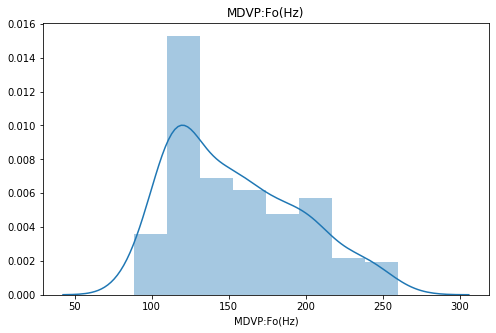

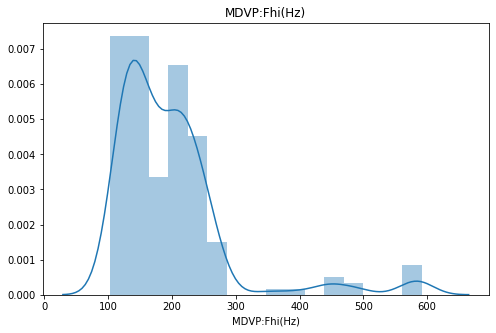

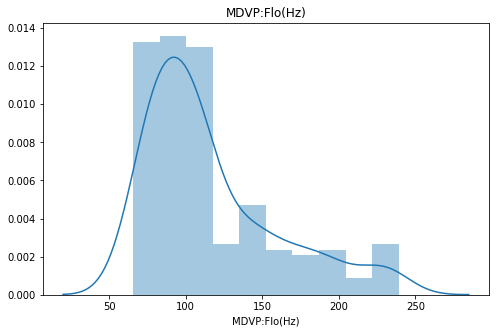

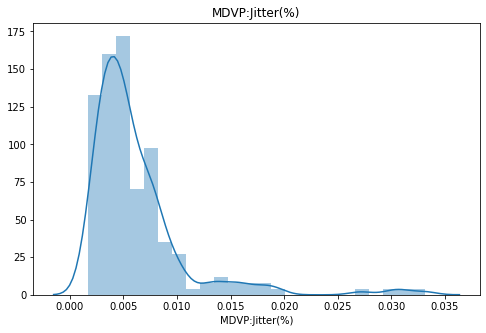

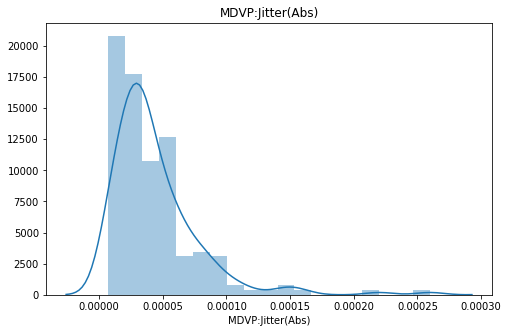

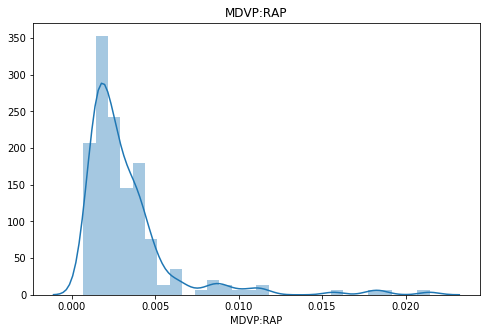

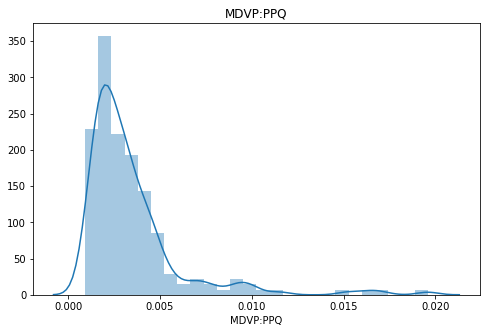

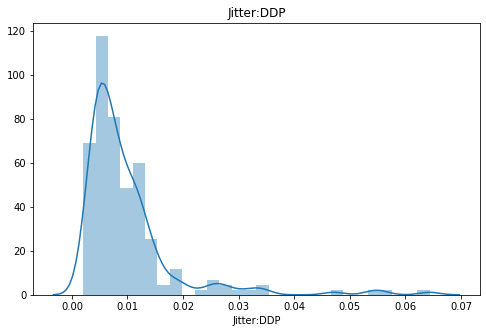

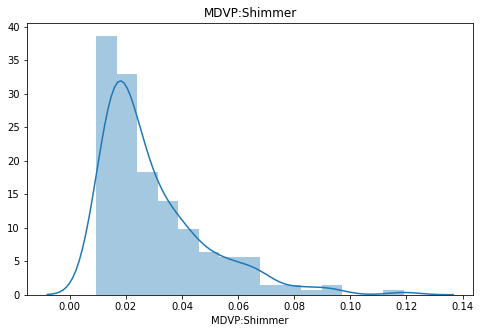

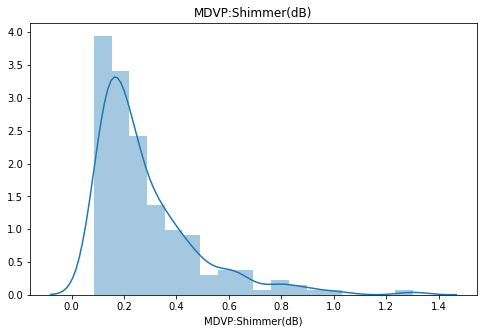

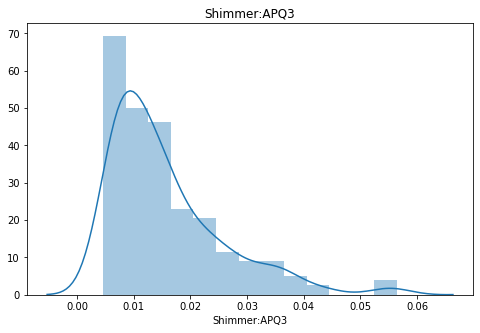

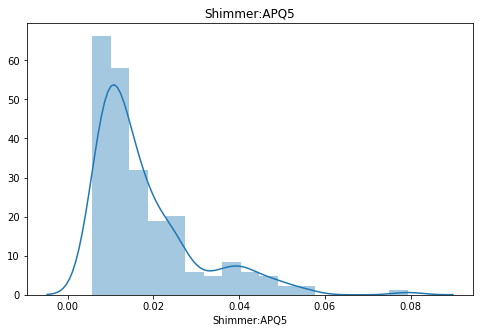

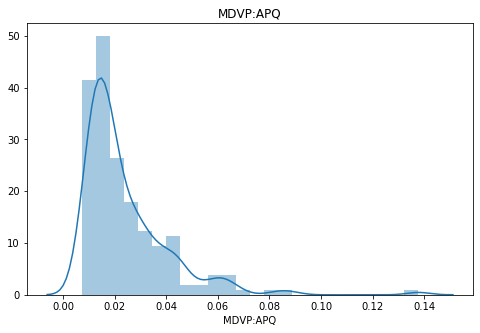

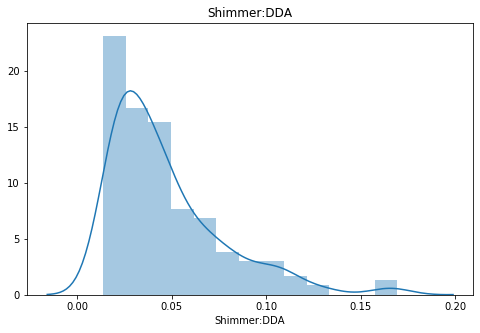

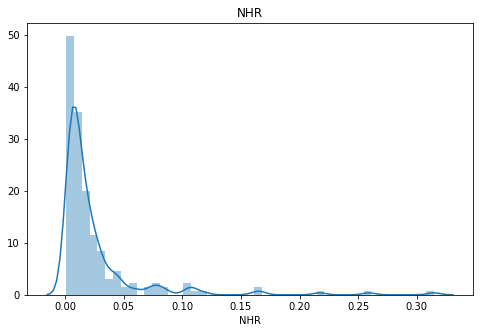

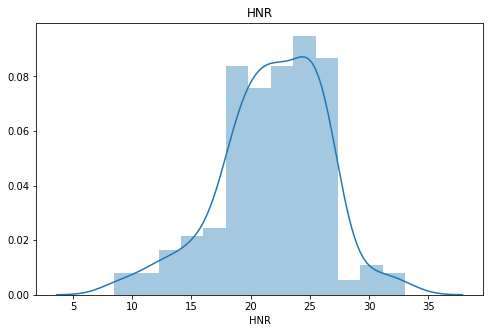

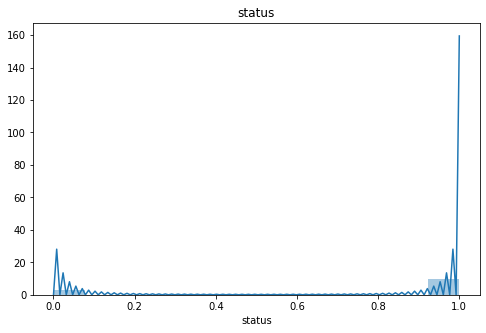

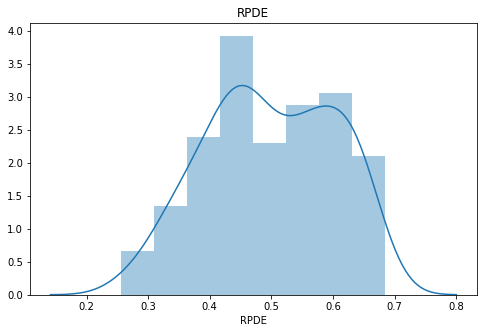

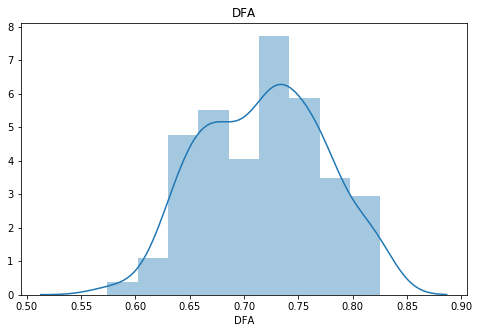

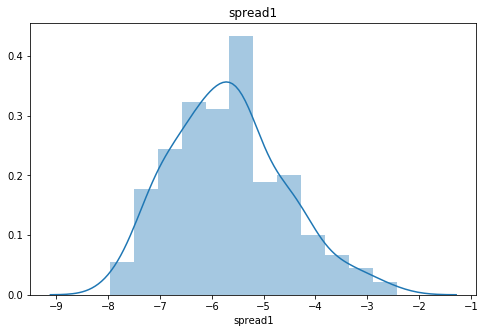

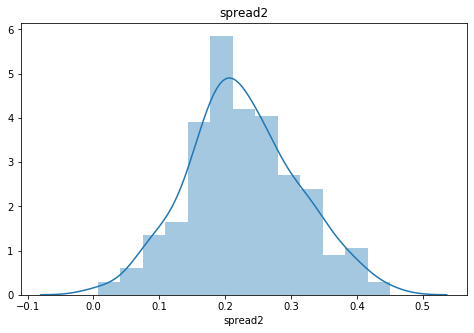

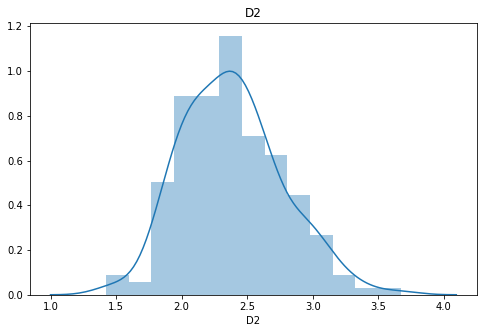

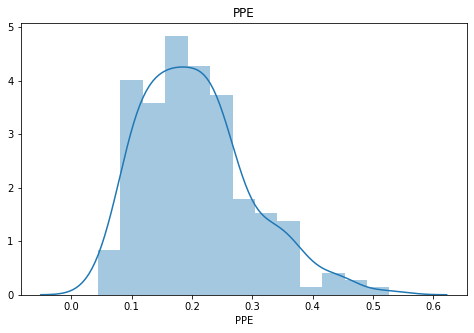

In [28]:
cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
for col in cols:
    plt.figure(figsize=(8,5))
    plt.title(col)
    sns.distplot(df[col]);
    plt.show()

- Upon plotting the distribution plot we can see that certain columns are right skewed revealing that there might be outliars.
- There are also columns that are evenly distributed.
- Columns that are evenly disributed.
    - D2
    - Spread2
    - Spread1
    - DFA
    - HNR
- Rest of the columns are right skewed.

#### Correlation Heat Map:

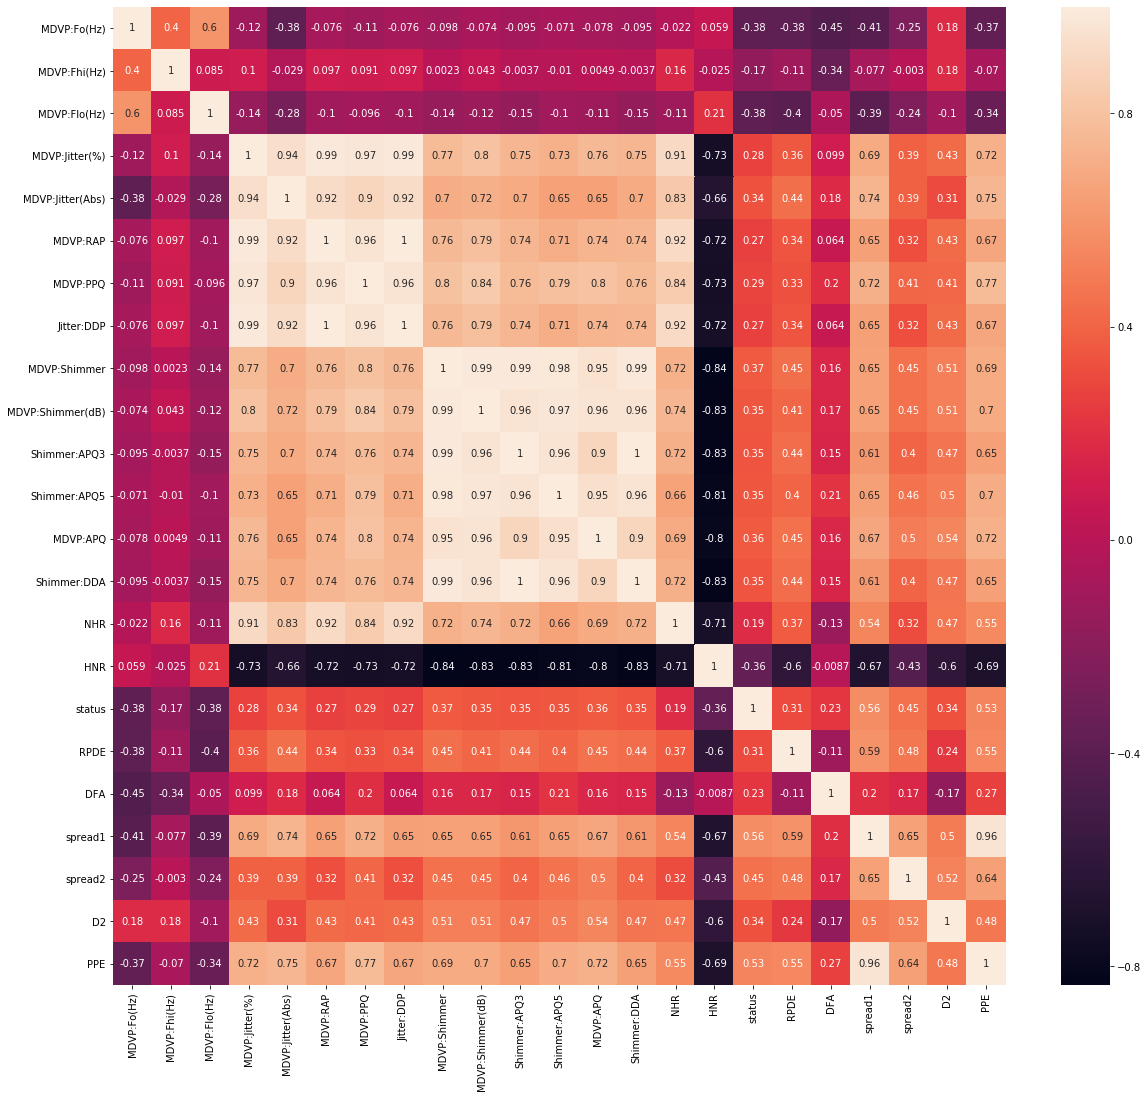

In [29]:
plt.figure(figsize=(20, 18))
sns.heatmap(df.corr(), annot=True)

In [37]:
from IPython.display import display
pd.options.display.max_columns = None

In [47]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# retianing only the columns that has more than 0.95 corelation
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# making a deep copy of the ouriginal data frame
df1 = df.copy(deep=True)

# dropping any column that has less than 0.95 corelation score
df1.drop(to_drop, axis=1, inplace=True)

### Creating train test split

In [50]:
X = df1.drop(['status','name'], axis=1)
y = df1['status']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

### Model Creation

In [254]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,BaggingClassifier,VotingClassifier
from sklearn import model_selection

#creating model list
models = []
modelscore = []

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=8,max_features=7,min_samples_split=4)
data = ('DecisionTreeClassifier', clf1)
models.append(data)
clf1 = clf1.fit(X_train, y_train)
score =  clf1.score(X_train, y_train)
modelscore.append(('DecisionTreeClassifier',score))

clf2 = KNeighborsClassifier(n_neighbors=3,)
data = ('KNeighborsClassifier', clf2)
models.append(data)
clf2 = clf2.fit(X_train, y_train)
score =  clf2.score(X_train, y_train)
modelscore.append(('KNeighborsClassifier',score))

clf3 = xgboost.XGBClassifier(learning_rate= 0.01, n_estimators=100, max_depth= 3, subsample= 0.8, colsample_bytree= 1,gamma= 1)
data = ('XGBClassifier', clf3)
models.append(data)
clf3 = clf3.fit(X_train, y_train)
score =  clf3.score(X_train, y_train)
modelscore.append(('XGBClassifier',score))

clf4 = RandomForestClassifier(n_estimators=40,random_state=100)
data = ('RandomForestClassifier', clf4)
models.append(data)
clf4 = clf4.fit(X_train, y_train)
score =  clf4.score(X_train, y_train)
modelscore.append(('RandomForestClassifier',score))

clf5 = AdaBoostClassifier(n_estimators=300, random_state=0)
data = ('AdaBoostClassifier', clf5)
models.append(data)
clf5 = clf5.fit(X_train, y_train)
score =  clf5.score(X_train, y_train)
modelscore.append(('AdaBoostClassifier',score))

clf6 = ExtraTreesClassifier(n_estimators=100, max_depth=None, random_state=0)
data = ('ExtraTreesClassifier', clf6)
models.append(data)
clf6 = clf6.fit(X_train, y_train)
score =  clf6.score(X_train, y_train)
modelscore.append(('ExtraTreesClassifier',score))

clf7 = SVC(gamma='scale',probability=True)
data = ('SVC', clf7)
models.append(data)
clf7 = clf7.fit(X_train, y_train)
score =  clf7.score(X_train, y_train)
modelscore.append(('SVC', score))

clf8 = GradientBoostingClassifier(n_estimators=95)
data = ('GradientBoostingClassifier', clf8)
models.append(data)
clf8 = clf8.fit(X_train, y_train)
score =  clf8.score(X_train, y_train)
modelscore.append(('GradientBoostingClassifier',score))

clf9 = BaggingClassifier(base_estimator = AdaBoostClassifier(),n_estimators = 200)
data = ('BaggingClassifier', clf9)
models.append(data)
clf9 = clf9.fit(X_train, y_train)
score =  clf9.score(X_train, y_train)
modelscore.append(('BaggingClassifier',score))

eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('xgb', clf3), ('rdf',clf4), 
                                    ('adb', clf5), ('etc', clf6), ('svc', clf7), ('GBD',clf8), ('BGC', clf9)], voting='soft')
data = ('VotingClassifier', eclf)
models.append(data)
eclf = eclf.fit(X_train, y_train)
score =  eclf.score(X_train, y_train)
modelscore.append(('VotingClassifier',score))

#### Visualize Model Performance on Training Data

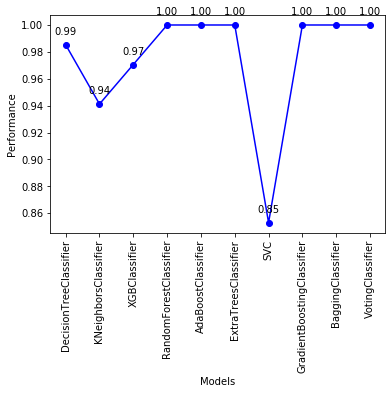

In [256]:
plt.clf()

model, score  = zip(*modelscore)

# 'bo-' means blue color, round points, solid lines
plt.plot(model,score,'bo-')

# zip joins x and y coordinates in pairs
for x,y in zip(model,score):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel("Models")
plt.xticks(rotation='vertical')
plt.ylabel("Performance")
plt.show()

### Training and Evaluation

In [257]:
accscore = []
for model in models:
    y_pred = model[1].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accscore.append((acc, model[0]))

#### Visualize Model Performance on Test Data

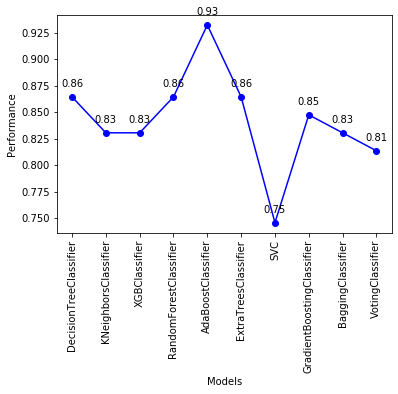

In [247]:
plt.clf()

score, model = zip(*accscore)

# 'bo-' means blue color, round points, solid lines
plt.plot(model,score,'bo-')

# zip joins x and y coordinates in pairs
for x,y in zip(model,score):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel("Models")
plt.xticks(rotation='vertical')
plt.ylabel("Performance")
plt.show()